<a href="https://colab.research.google.com/github/Bisma-Ejaz/2022-SE-05-LAB-TASKS/blob/main/Dollar_Bill_Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip Bill_dataset.zip


Archive:  Bill_dataset.zip
   creating: Bill_dataset/
  inflating: Bill_dataset/.DS_Store  
  inflating: __MACOSX/Bill_dataset/._.DS_Store  
   creating: Bill_dataset/20/
   creating: Bill_dataset/1/
   creating: Bill_dataset/10/
   creating: Bill_dataset/5/
  inflating: Bill_dataset/20/b0027_A.tif  
  inflating: __MACOSX/Bill_dataset/20/._b0027_A.tif  
  inflating: Bill_dataset/20/b0003_A.tif  
  inflating: __MACOSX/Bill_dataset/20/._b0003_A.tif  
  inflating: Bill_dataset/20/a0057_A.tif  
  inflating: __MACOSX/Bill_dataset/20/._a0057_A.tif  
  inflating: Bill_dataset/20/a0055_A.tif  
  inflating: __MACOSX/Bill_dataset/20/._a0055_A.tif  
  inflating: Bill_dataset/20/b0060_A.tif  
  inflating: __MACOSX/Bill_dataset/20/._b0060_A.tif  
  inflating: Bill_dataset/20/b0025_A.tif  
  inflating: __MACOSX/Bill_dataset/20/._b0025_A.tif  
  inflating: Bill_dataset/20/b0059_A.tif  
  inflating: __MACOSX/Bill_dataset/20/._b0059_A.tif  
  inflating: Bill_dataset/20/b0005_A.tif  
  inflating: __MACO

In [2]:
import os

base_dir = "data"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

classes = ["1", "5", "10", "20"]

for folder in [train_dir, test_dir]:
    for cls in classes:
        os.makedirs(os.path.join(folder, cls), exist_ok=True)

print("Train and Test folders created")


Train and Test folders created


In [3]:
import shutil
import random

source_dir = "Bill_dataset"

for cls in classes:
    images = os.listdir(os.path.join(source_dir, cls))
    images = [img for img in images if img.endswith(".tif")]

    random.shuffle(images)
    split = int(0.8 * len(images))

    train_imgs = images[:split]
    test_imgs = images[split:]

    for img in train_imgs:
        shutil.copy(
            os.path.join(source_dir, cls, img),
            os.path.join(train_dir, cls, img)
        )

    for img in test_imgs:
        shutil.copy(
            os.path.join(source_dir, cls, img),
            os.path.join(test_dir, cls, img)
        )

print("Dataset split into Train and Test")


Dataset split into Train and Test


In [4]:
!pip install tensorflow pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 743.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 21.4 MB/s eta 0:00:00


In [10]:
"data/test/1/"


'data/test/1/'

In [11]:
import os

path = os.path.join("data", "test", "1")
print(path)


data/test/1


In [12]:
"data/test/5/"



'data/test/5/'

In [13]:
"data/test/20/"


'data/test/20/'

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Ignore MacOS junk files
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Paths
TRAIN_DIR = "data/train"
TEST_DIR = "data/test"

# Image settings
IMG_SIZE = 128
BATCH_SIZE = 16
EPOCHS = 10

# Data generators (supports .tif images)
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = test_gen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu',
           input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 1, 5, 10, 20
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data
)

# Evaluate
loss, accuracy = model.evaluate(test_data)

print("\n==============================")
print(f"TEST ACCURACY: {accuracy * 100:.2f}%")
print("==============================")

# Save model
model.save("dollar_bill_model.h5")


Found 127 images belonging to 4 classes.
Found 34 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.3643 - loss: 1.7854 - val_accuracy: 0.5294 - val_loss: 1.1129
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.5692 - loss: 1.0621 - val_accuracy: 0.7353 - val_loss: 0.8966
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.8352 - loss: 0.7015 - val_accuracy: 0.8235 - val_loss: 0.6058
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.9055 - loss: 0.3519 - val_accuracy: 0.8235 - val_loss: 0.5829
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.9655 - loss: 0.1492 - val_accuracy: 0.9412 - val_loss: 0.3021
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.9834 - loss: 0.0870 - val_accuracy: 0.8824 - val_loss: 0.3075
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.9801 - loss: 0.0796 - val_accuracy: 0.9412 - val_loss: 0.2377
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.9412 - val_loss: 0.1925
Epo


TEST ACCURACY: 97.06%


Using image for prediction: data/test/10/b0020_A.tif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


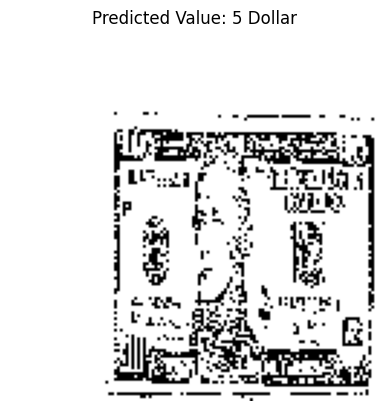

Predicted Dollar Bill Value: 5 Dollar


In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os # Added os import for path operations

# Load trained model
model = tf.keras.models.load_model("dollar_bill_model.h5")

# Class labels (same as folder names)
class_labels = ["1 Dollar", "5 Dollar", "10 Dollar", "20 Dollar"]

# Path of image to test
# Find a valid image name in the data/test/10 directory
test_10_dir = "data/test/10"
files_in_dir = os.listdir(test_10_dir)
tif_files = [f for f in files_in_dir if f.endswith(".tif")]

if tif_files:
    img_path = os.path.join(test_10_dir, tif_files[0]) # Use the first .tif file found
    print(f"Using image for prediction: {img_path}")
else:
    raise FileNotFoundError(f"No .tif files found in {test_10_dir}. Please ensure images are present for class 10 in the test set.")

# Load and preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
predicted_value = class_labels[predicted_class]

# Display result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Value: {predicted_value}")
plt.show()

print("Predicted Dollar Bill Value:", predicted_value)
